In [1]:
import pandas as pd
df = pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
df_cleaned = df.drop(columns=["Ad Topic Line", "City", "Country", "Timestamp"])

In [4]:
X = df_cleaned.drop("Clicked on Ad", axis=1)
y = df_cleaned["Clicked on Ad"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
max_depth = 4

In [7]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [8]:
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [9]:
y_pred_entropy = clf_entropy.predict(X_test)
y_pred_gini = clf_gini.predict(X_test)

In [10]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

In [11]:
report_entropy = classification_report(y_test, y_pred_entropy, target_names=["Not Clicked", "Clicked"])
report_gini = classification_report(y_test, y_pred_gini, target_names=["Not Clicked", "Clicked"])


In [12]:
print("="*40)
print("Decision Tree (Entropy) Results")
print("="*40)
print(f"Accuracy: {accuracy_entropy:.2%}")
print("Classification Report:\n")
print(report_entropy)

Decision Tree (Entropy) Results
Accuracy: 92.00%
Classification Report:

              precision    recall  f1-score   support

 Not Clicked       0.90      0.92      0.91        89
     Clicked       0.94      0.92      0.93       111

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [13]:
print("\n" + "="*40)
print("Decision Tree (Gini Index) Results")
print("="*40)
print(f"Accuracy: {accuracy_gini:.2%}")
print("Classification Report:\n")
print(report_gini)


Decision Tree (Gini Index) Results
Accuracy: 92.50%
Classification Report:

              precision    recall  f1-score   support

 Not Clicked       0.91      0.92      0.92        89
     Clicked       0.94      0.93      0.93       111

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



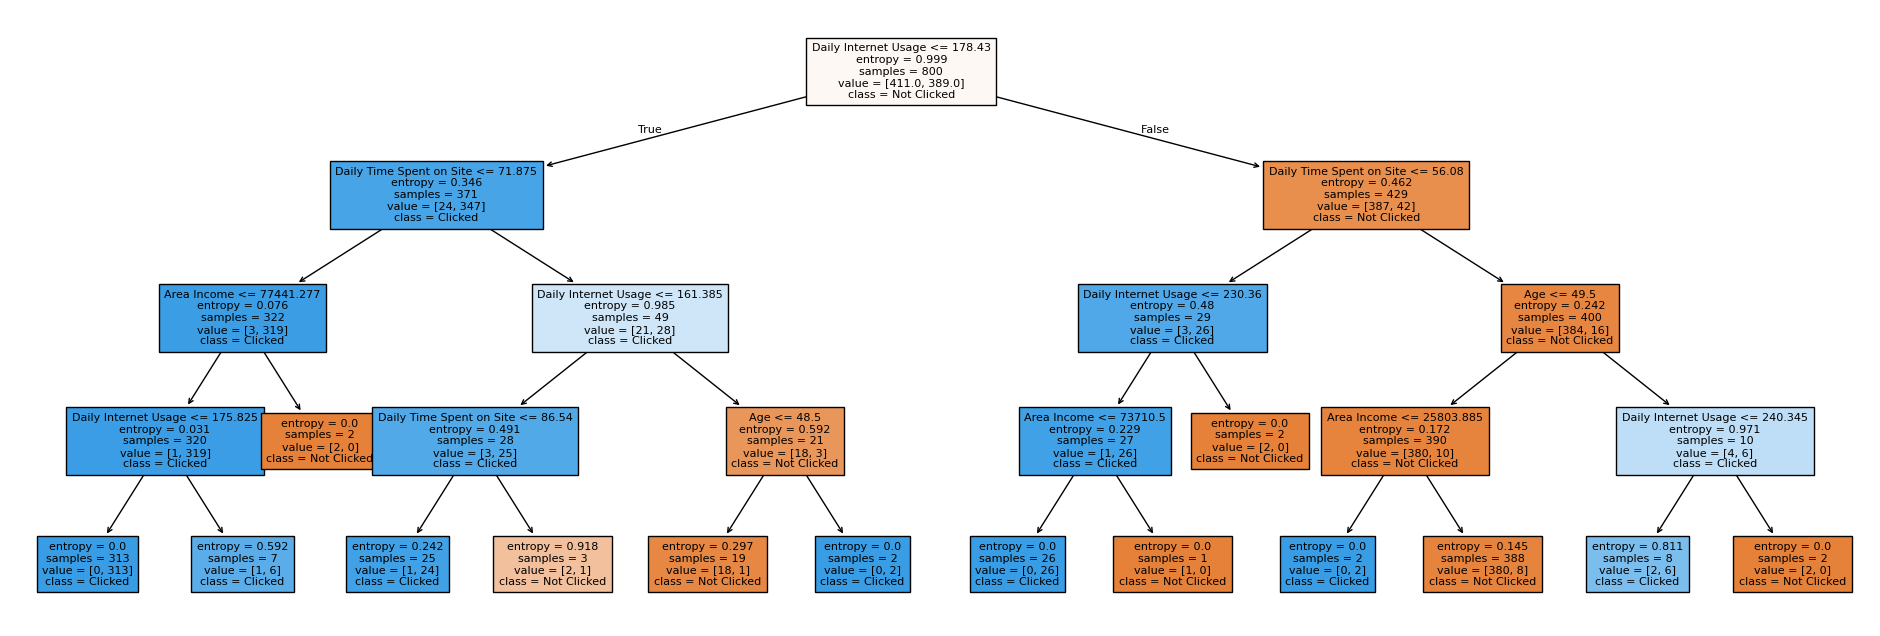

In [26]:
plt.figure(figsize=(24, 8))
plt.title("Decision Tree - Entropy (Max Depth = 4)")
plot_tree(clf_entropy, feature_names=X.columns, class_names=["Not Clicked", "Clicked"], filled=True, fontsize=8)
plt.show()

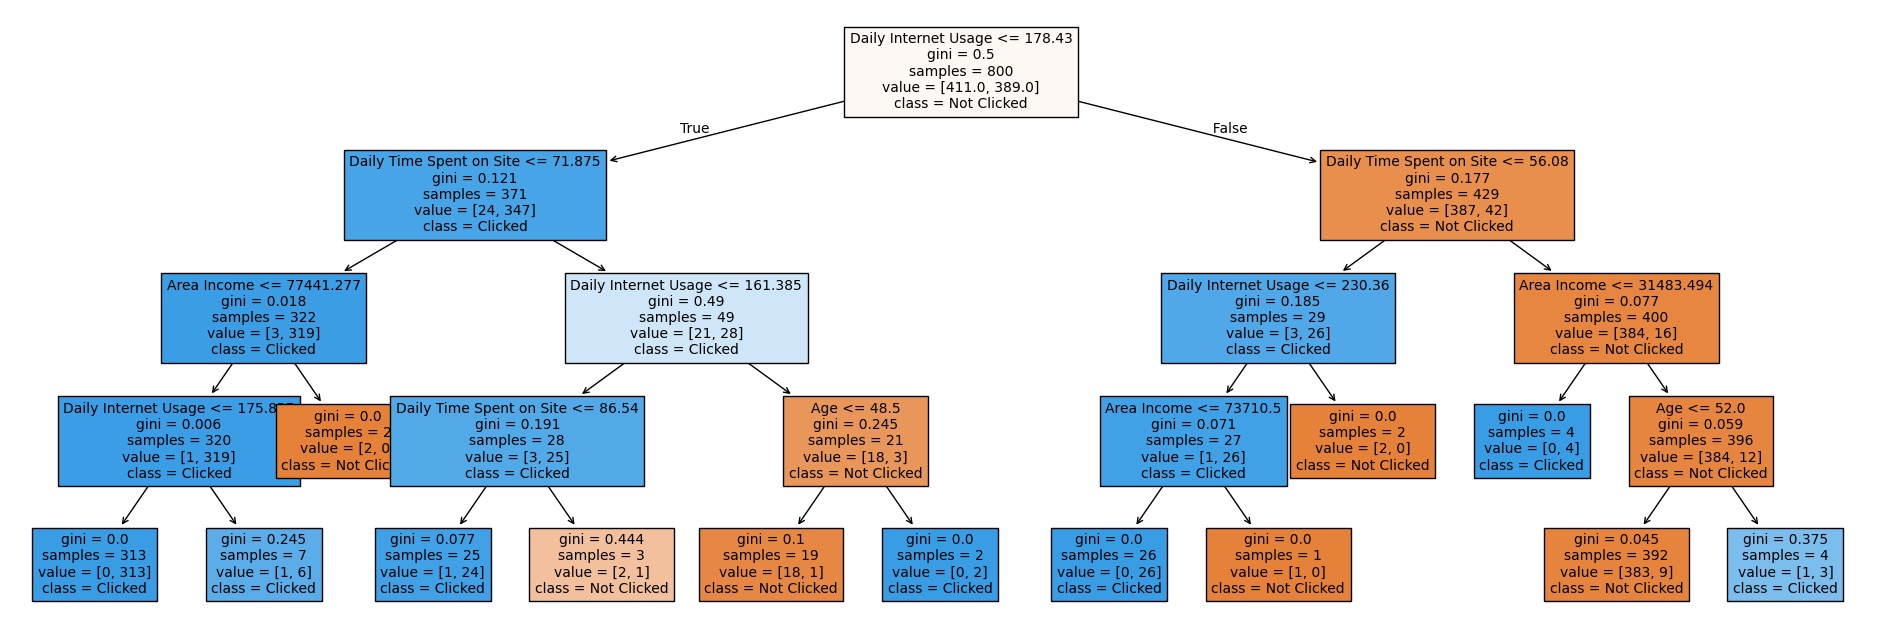

In [27]:
plt.figure(figsize=(24, 8))
plt.title("Decision Tree - Gini Index (Max Depth = 4)")
plot_tree(clf_gini, feature_names=X.columns, class_names=["Not Clicked", "Clicked"], filled=True, fontsize=10)
plt.show()